In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



In [4]:
data = np.genfromtxt('dataaa.txt')

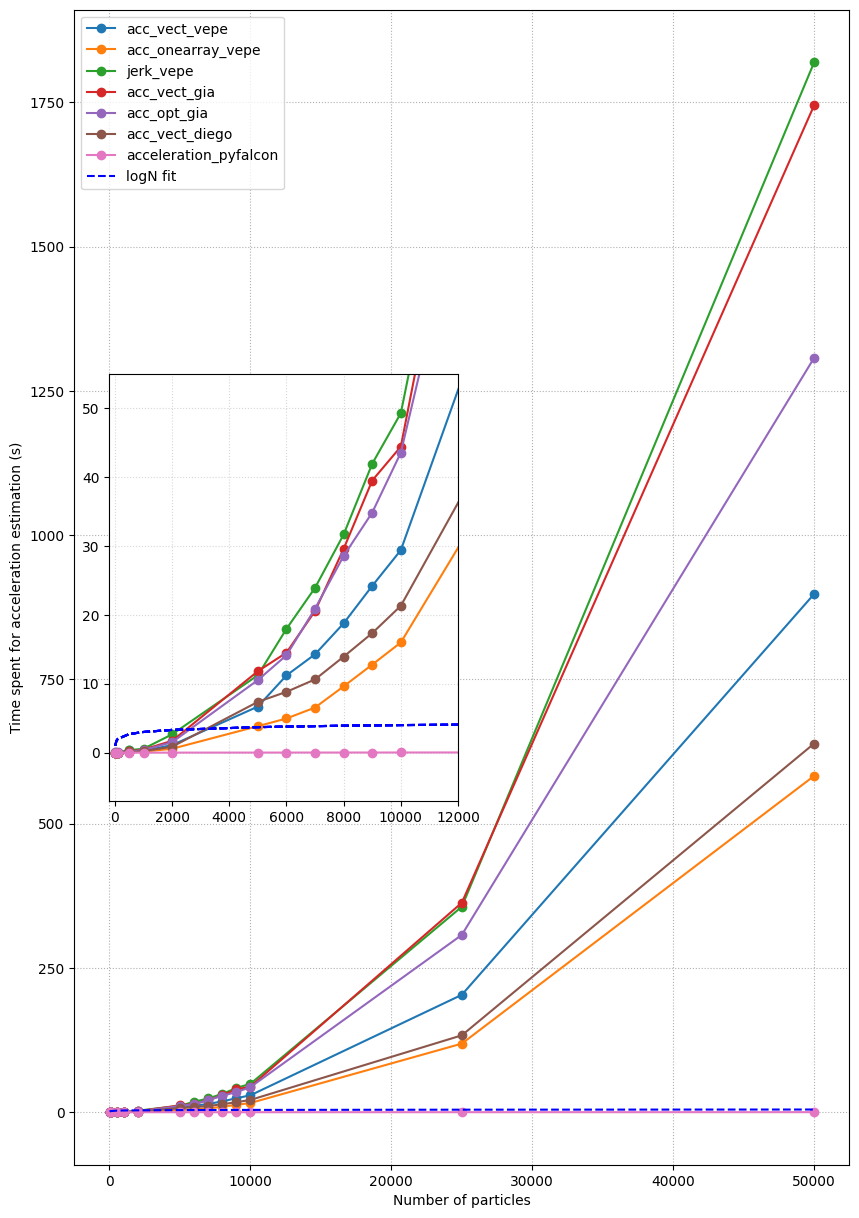

In [18]:
N_list_dir = data[0, 0:7]
N_list_vect = data[0, :]
dt_dir = data[1:4, 0:7]
dt_vect = data[4:, :]

func_list = ['acc_dir_vepe', 
             'acc_dir_gia', 
             'acc_dir_diego', 
             'acc_vect_vepe', 
             'acc_onearray_vepe', 
             'jerk_vepe', 
             'acc_vect_gia', 
             'acc_opt_gia', 
             'acc_vect_diego', 
            #  'acceleration_pyfalcon']



# pdf = matplotlib.backends.backend_pdf.PdfPages("plots/plot_vect_model.pdf")


# Generate some sample data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 15))

# Main plot
# for i in range(dt_dir.shape[0]):
#     ax[0].plot(N_list_dir, dt_dir[i], 'o-', label=func_list[i])
#     ax[1].plot(N_list_dir, dt_dir[i], 'o-', label=func_list[i])

for j in range(dt_vect.shape[0]):
    ax.plot(N_list_vect, dt_vect[j], 'o-', label=func_list[j+dt_dir.shape[0]])
    # ax[1].plot(N_list_vect, dt_vect[j], 'o-', label=func_list[j+dt_dir.shape[0]])

# plt.plot(N_list_vect, N_list_vect, 'k--', label='Linear fit')
# plt.plot(N_list_vect, N_list_vect**2, 'r--', label='Quadratic fit')
# plt.plot(N_list_vect, N_list_vect**3, 'g--', label='Cubic fit')
plt.plot(N_list_vect, np.log10(N_list_vect), 'b--', label='logN fit')
# plt.plot(N_list_vect, N_list_vect*np.log10(N_list_vect), 'k:', label='NlogN fit')
# plt.plot(N_list_vect, N_list_vect**2*np.log10(N_list_vect), 'r:', label='N^2logN fit')

axins = inset_axes(ax, width="45%", height="37%", bbox_to_anchor=(.036, .0, 1, 1), loc='center left', bbox_transform=ax.transAxes)
for i in range(dt_vect.shape[0]):
    axins.plot(N_list_vect, dt_vect[i], 'o-', label=func_list[i+dt_dir.shape[0]])
    axins.plot(N_list_vect, np.log10(N_list_vect), 'b--', label='logN fit')

axins.set_xlim(-200, 12000)
axins.set_ylim(-7, 55)
axins.grid(linestyle='dotted', alpha=0.5)


ax.legend(loc='best')
ax.grid(linestyle='dotted')
ax.set_xlabel('Number of particles')
ax.set_ylabel('Time spent for acceleration estimation (s)')

plt.show()

acc_dir_vepe(N) = 0.0000000000 * N^3 + 0.0000000000 * N^2 + 0.0000021658 * N + -0.0000996232

Accuracy of the fit for acc_dir_vepe: [4.31741163e-17 2.92907007e-12 4.50944020e-08 1.45501354e-04]
acc_dir_gia(N) = 0.0000000000 * N^3 + 0.0000002996 * N^2 + -0.0001372678 * N + 0.1126196687

Accuracy of the fit for acc_dir_gia: [4.87893336e-14 3.31002448e-09 5.09593328e-05 1.64424968e-01]
acc_dir_diego(N) = 0.0000000000 * N^3 + 0.0000001561 * N^2 + -0.0001486641 * N + 0.0643339302

Accuracy of the fit for acc_dir_diego: [3.80634843e-14 2.58234945e-09 3.97564538e-05 1.28277885e-01]
acc_vect_vepe(N) = 0.0000000000 * N^3 + 0.0000003843 * N^2 + 0.0004703794 * N + -0.1281504508

Accuracy of the fit for acc_vect_vepe: [1.02464730e-13 6.95152816e-09 1.07021919e-04 3.45315885e-01]
acc_onearray_vepe(N) = 0.0000000000 * N^3 + 0.0000005081 * N^2 + -0.0007804869 * N + 0.4907075992

Accuracy of the fit for acc_onearray_vepe: [1.91619423e-13 1.30000734e-08 2.00142051e-04 6.45776610e-01]
jerk_vepe(N) = 0.0

IndexError: index 7 is out of bounds for axis 0 with size 7

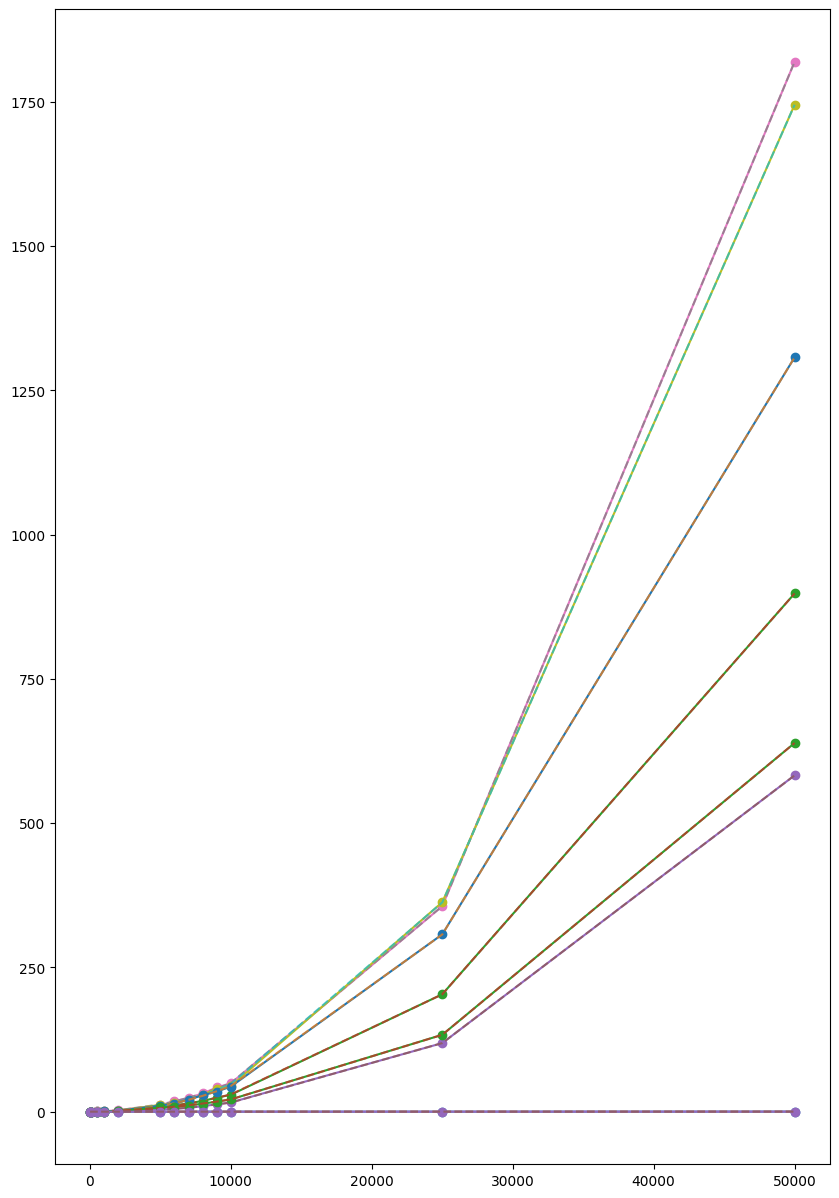

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ... (your previous code)

def quadratic_fit(N, a, b, c, d):
    return a * N**3 + b * N**2 + c * N + d

# Define the fitting function for each entry in func_list
fitting_functions = {
    'acc_dir_vepe': quadratic_fit,
    'acc_dir_gia': quadratic_fit,
    'acc_dir_diego': quadratic_fit,
    'acc_vect_vepe': quadratic_fit,
    'acc_onearray_vepe': quadratic_fit,
    'jerk_vepe': quadratic_fit,
    'acc_vect_gia': quadratic_fit,
    'acc_opt_gia': quadratic_fit,
    'acc_vect_diego': quadratic_fit,
    # 'acceleration_pyfalcon': quadratic_fit,
}

# Generate some sample data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 15))

for func_name, fit_func in fitting_functions.items():
    # Fit the current function to the data
    idx = func_list.index(func_name)
    params, covariance = curve_fit(fit_func, N_list_vect, dt_vect[idx-1])

    a, b, c, d = params
    
    # Print the function and its coefficients
    print(f"{func_name}(N) = {a:.10f} * N^3 + {b:.10f} * N^2 + {c:.10f} * N + {d:.10f}")
    
    std_dev = np.sqrt(np.diag(covariance))
    print()
    print(f"Accuracy of the fit for {func_name}: {std_dev}")

    # Plot the original data
    ax.plot(N_list_vect, dt_vect[idx-1], 'o-', label=func_name)

    # Generate the fitted curve using the fitted parameters
    fitted_curve = fitting_functions[func_name](N_list_vect, *params)

    # Plot the fitted curve
    ax.plot(N_list_vect, fitted_curve, '--', label=f'{func_name} Fit', alpha=0.7)


# ... (your previous code for the inset axes)

ax.legend(loc='best')
ax.grid(linestyle='dotted')
ax.set_xlabel('Number of particles')
ax.set_ylabel('Time spent for acceleration estimation (s)')

plt.show()


acc_dir_vepe(N) = 0.0000 * N^2 * log10(N) + -0.5996 * log10(N) + 1.3912
Accuracy of the fit for acc_dir_vepe: [1.85327238e-10 5.38981004e-01 1.75333352e+00]
acc_dir_gia(N) = 0.0000 * N^2 * log10(N) + -2.2368 * log10(N) + 4.7356
Accuracy of the fit for acc_dir_gia: [4.40364157e-10 1.28069748e+00 4.16617629e+00]
acc_dir_diego(N) = 0.0000 * N^2 * log10(N) + -7.5492 * log10(N) + 16.4448
Accuracy of the fit for acc_dir_diego: [1.81297939e-09 5.27263227e+00 1.71521508e+01]
acc_vect_vepe(N) = 0.0000 * N^2 * log10(N) + -6.2453 * log10(N) + 13.1609
Accuracy of the fit for acc_vect_vepe: [1.14027384e-09 3.31622325e+00 1.07878492e+01]
acc_onearray_vepe(N) = 0.0000 * N^2 * log10(N) + -0.0359 * log10(N) + 0.0599
Accuracy of the fit for acc_onearray_vepe: [6.80605265e-11 1.97934751e-01 6.43891736e-01]
jerk_vepe(N) = 0.0000 * N^2 * log10(N) + -0.9724 * log10(N) + 2.4242
Accuracy of the fit for jerk_vepe: [4.70042126e-10 1.36700864e+00 4.44695106e+00]
acc_vect_gia(N) = 0.0000 * N^2 * log10(N) + 0.0073

IndexError: index 7 is out of bounds for axis 0 with size 7

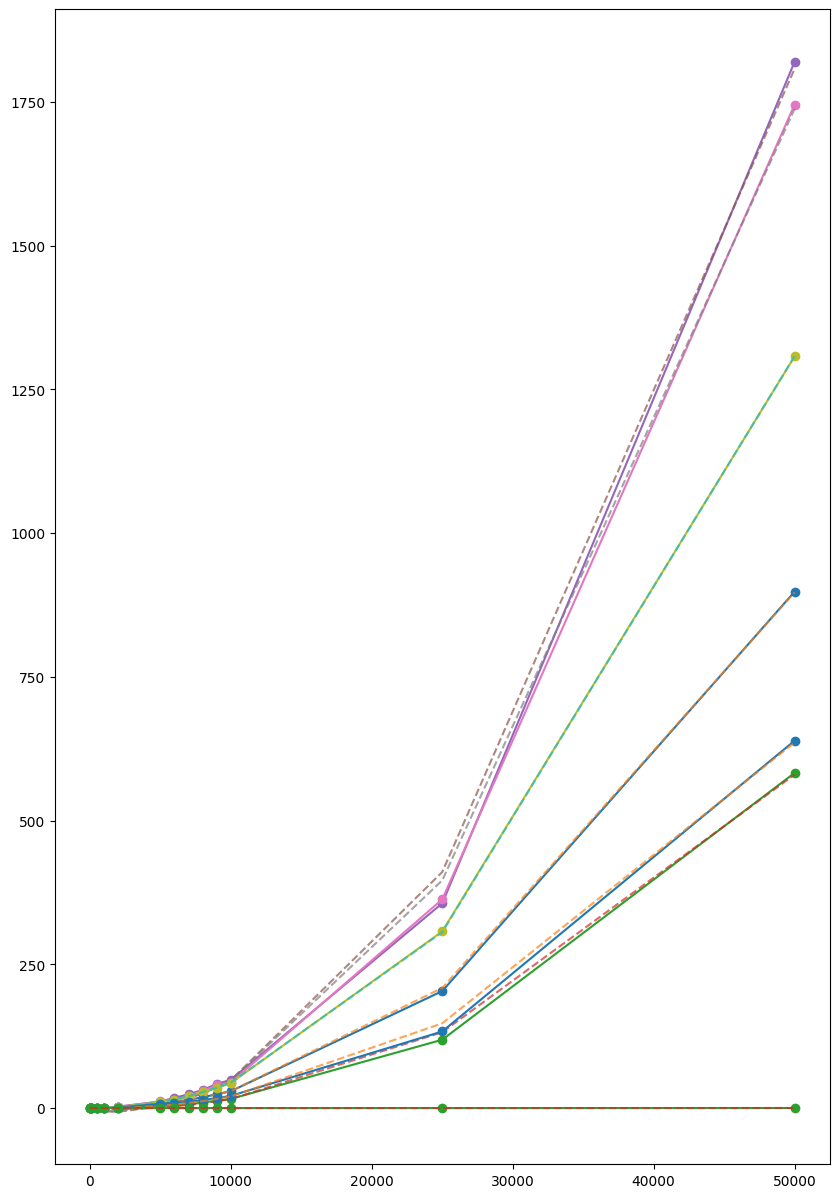

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ... (your previous code)

def linear_log_fit(N, a, b):
    return a * N * np.log10(N) + b

def quadratic_log_fit(N, a, b, c):
    return a * N**2 * np.log10(N) + b * np.log10(N) + c

def log_fit(N, a, b):
    return a * np.log10(N) + b

# Define the fitting function for each entry in func_list
fitting_functions = {
    'acc_dir_vepe': quadratic_log_fit,
    'acc_dir_gia': quadratic_log_fit,
    'acc_dir_diego': quadratic_log_fit,
    'acc_vect_vepe': quadratic_log_fit,
    'acc_onearray_vepe': quadratic_log_fit,
    'jerk_vepe': quadratic_log_fit,
    'acc_vect_gia': quadratic_log_fit,
    'acc_opt_gia': quadratic_log_fit,
    'acc_vect_diego': quadratic_log_fit,
    'acceleration_pyfalcon': quadratic_log_fit,
}

# Generate some sample data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 15))

for func_name in func_list:
    # Fit the current function to the data
    params, covariance = curve_fit(fitting_functions[func_name], N_list_vect, dt_vect[func_list.index(func_name)])
    
    # Extract the parameters
    if len(params) == 2:  # Linear or log fit
        a, b = params
        print(f"{func_name}(N) = {a:.4f} * log10(N) + {b:.4f}")
    else:  # Quadratic or other fits
        a, b, c = params
        print(f"{func_name}(N) = {a:.4f} * N^2 * log10(N) + {b:.4f} * log10(N) + {c:.4f}")

    std_dev = np.sqrt(np.diag(covariance))
    print(f"Accuracy of the fit for {func_name}: {std_dev}")
    
    # Plot the original data
    ax.plot(N_list_vect, dt_vect[func_list.index(func_name)], 'o-', label=func_name)

    # Generate the fitted curve using the fitted parameters
    fitted_curve = fitting_functions[func_name](N_list_vect, *params)

    # Plot the fitted curve
    ax.plot(N_list_vect, fitted_curve, '--', label=f'{func_name} Fit', alpha=0.7)

ax.legend(loc='best')
ax.grid(linestyle='dotted')
ax.set_xlabel('Number of particles')
ax.set_ylabel('Time spent for acceleration estimation (s)')

plt.show()
